In [220]:
import cv2
import os
import joblib
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import random
import shutil
import pathlib
import itertools
import math
import datetime as dt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from skimage.transform import resize
from matplotlib.pyplot import imshow
from IPython.display import clear_output
import concurrent.futures
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras import models
from keras import layers
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from IPython.core.display import Image
from tensorflow.keras.applications import VGG16
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LSTM, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler 
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier,XGBRegressor
import textwrap as tw
from pathlib import Path
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow_datasets as tfds
from PIL import Image, ImageEnhance
import multiprocessing
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder

In [256]:
sm="../input/stock-market-dataset/stocks/ABM.csv"
sm = pd.read_csv(sm,na_values=["null"],index_col="Date",parse_dates=True,infer_datetime_format=True)
sm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,0.950000,0.933333,0.933333,0.027191,18400
1980-03-18,0.000000,0.933333,0.908333,0.916667,0.026705,32800
1980-03-19,0.916667,0.916667,0.916667,0.916667,0.026705,0
1980-03-20,0.000000,0.933333,0.925000,0.933333,0.027191,29600
1980-03-21,0.000000,0.933333,0.933333,0.933333,0.027191,9600
...,...,...,...,...,...,...
2020-03-26,21.000000,22.450001,20.730000,22.049999,21.882542,1031800
2020-03-27,21.209999,23.620001,21.000000,21.990000,21.822998,1455700
2020-03-30,22.209999,24.219999,21.600000,24.170000,23.986443,602300


In [196]:
sm.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10098.0,14.313921,11.650365,0.000000,4.000000,14.187500,21.309999,4.499000e+01
High,10098.0,14.669030,11.557603,0.866667,4.031250,14.437500,21.637499,4.512000e+01
Low,10098.0,14.341660,11.307207,0.866667,4.000000,14.000000,20.957500,4.467000e+01
Close,10098.0,14.513697,11.438003,0.866667,4.000000,14.250000,21.340000,4.479000e+01
Adj Close,10098.0,10.985548,11.327190,0.025249,0.774204,8.463741,17.016195,4.227962e+01
Volume,10098.0,158516.963755,222692.597814,0.000000,28400.000000,91500.000000,210000.000000,4.552500e+06


In [197]:
sm.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

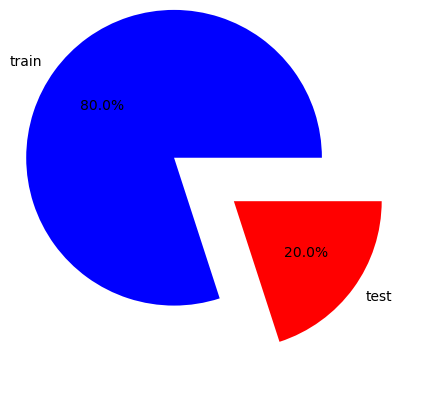

In [243]:
plt.pie([len(train), len(test)], 
labels=['train','test'], autopct='%.1f%%', colors=['blue','red'], explode=(0.5, 0))
plt.show()

Dataframe Shape:  (10098, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

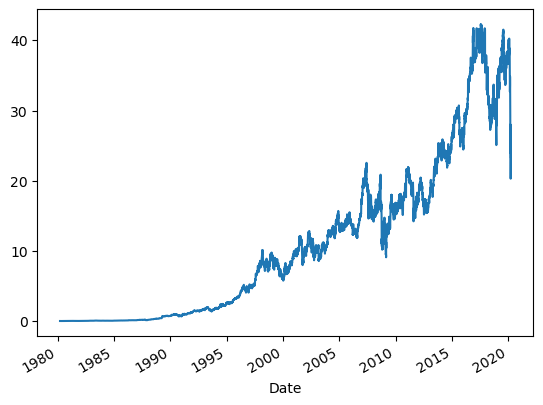

In [199]:
print("Dataframe Shape: ", sm. shape)
print("Null Value Present: ", sm.isnull().values.any())
sm["Adj Close"].plot()

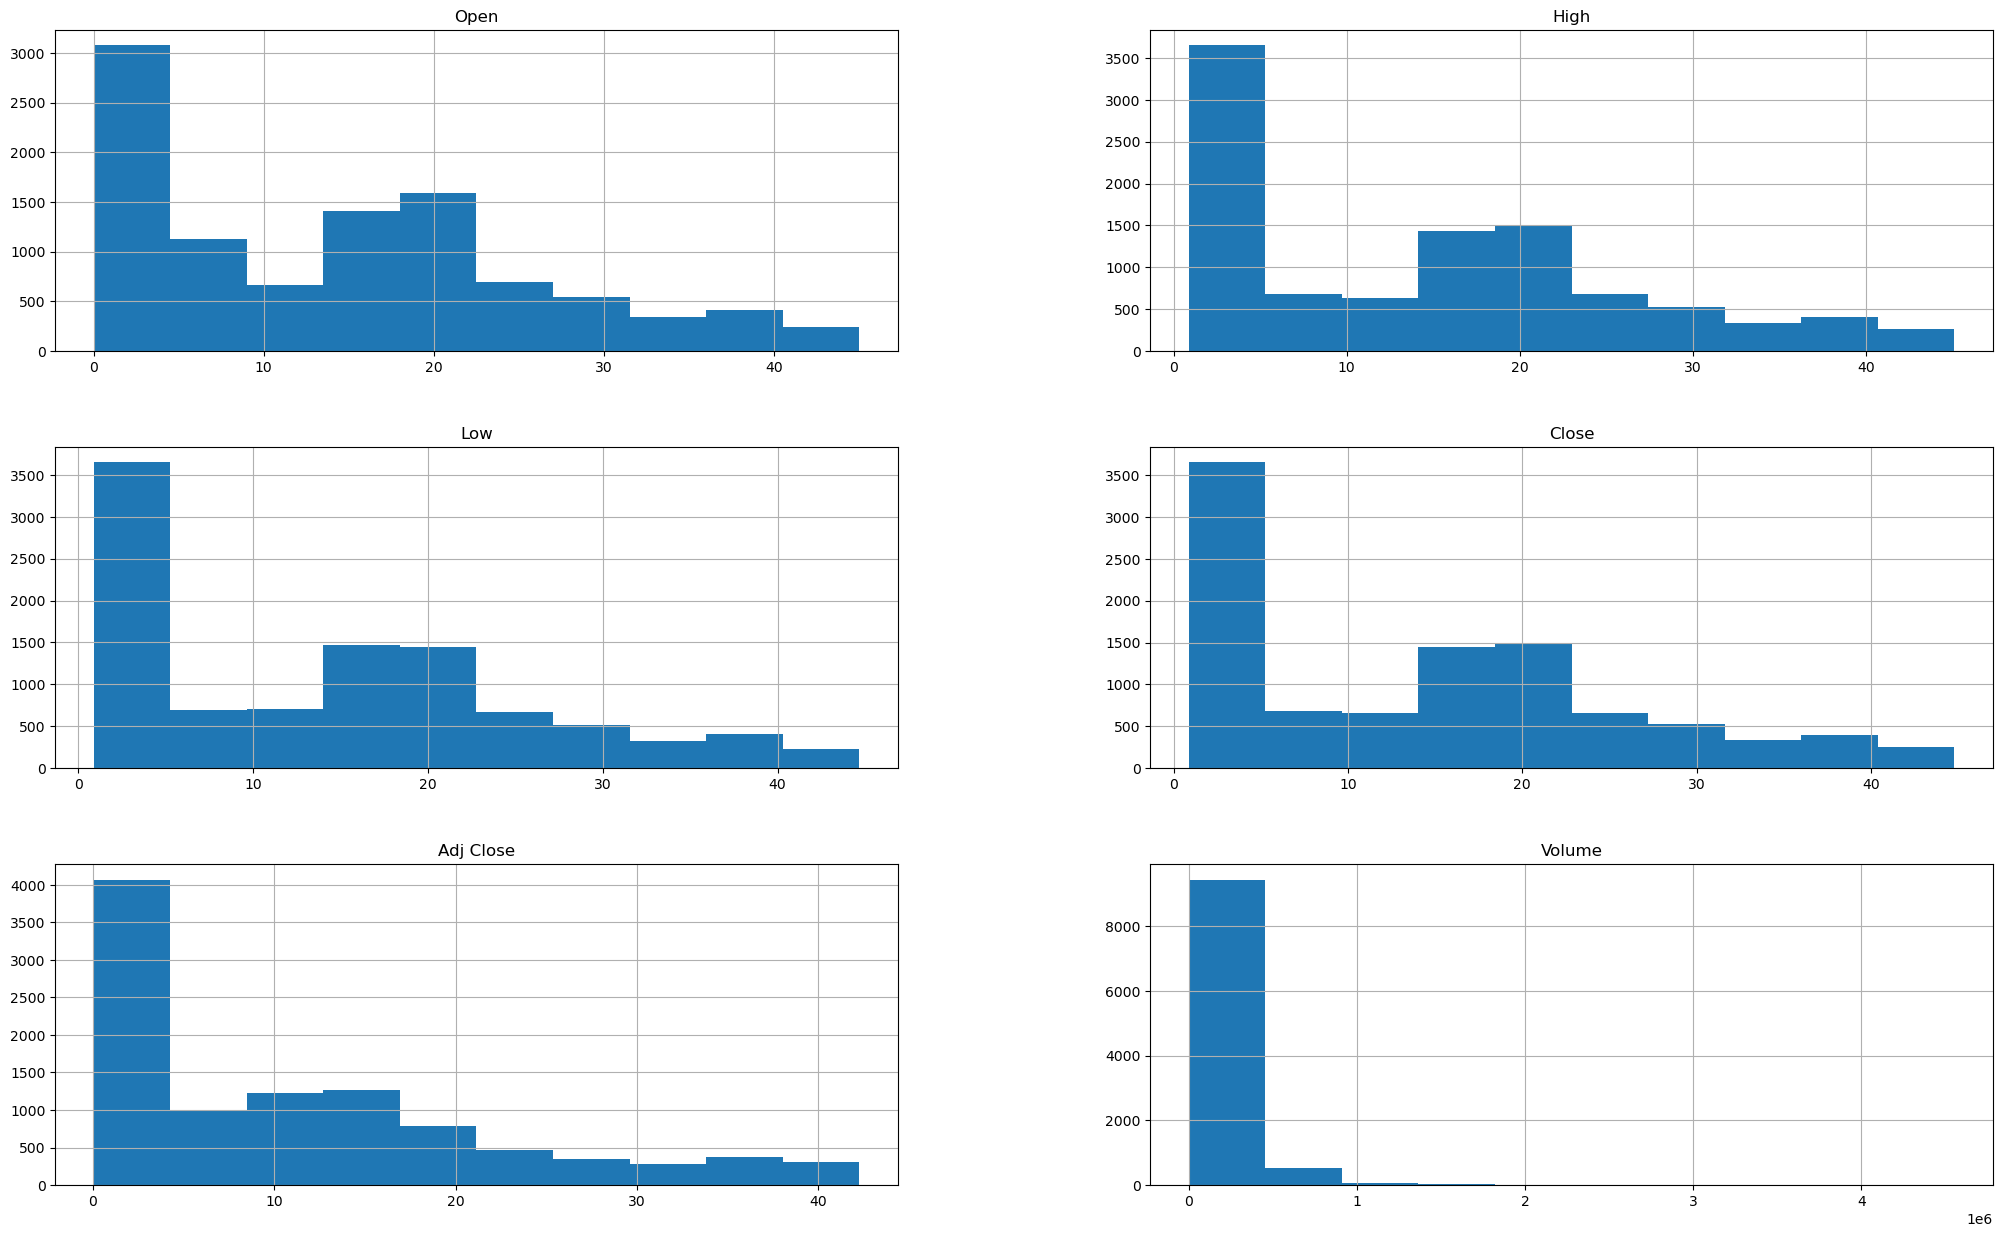

In [200]:
sm.hist(figsize=(25,15))
plt.show()

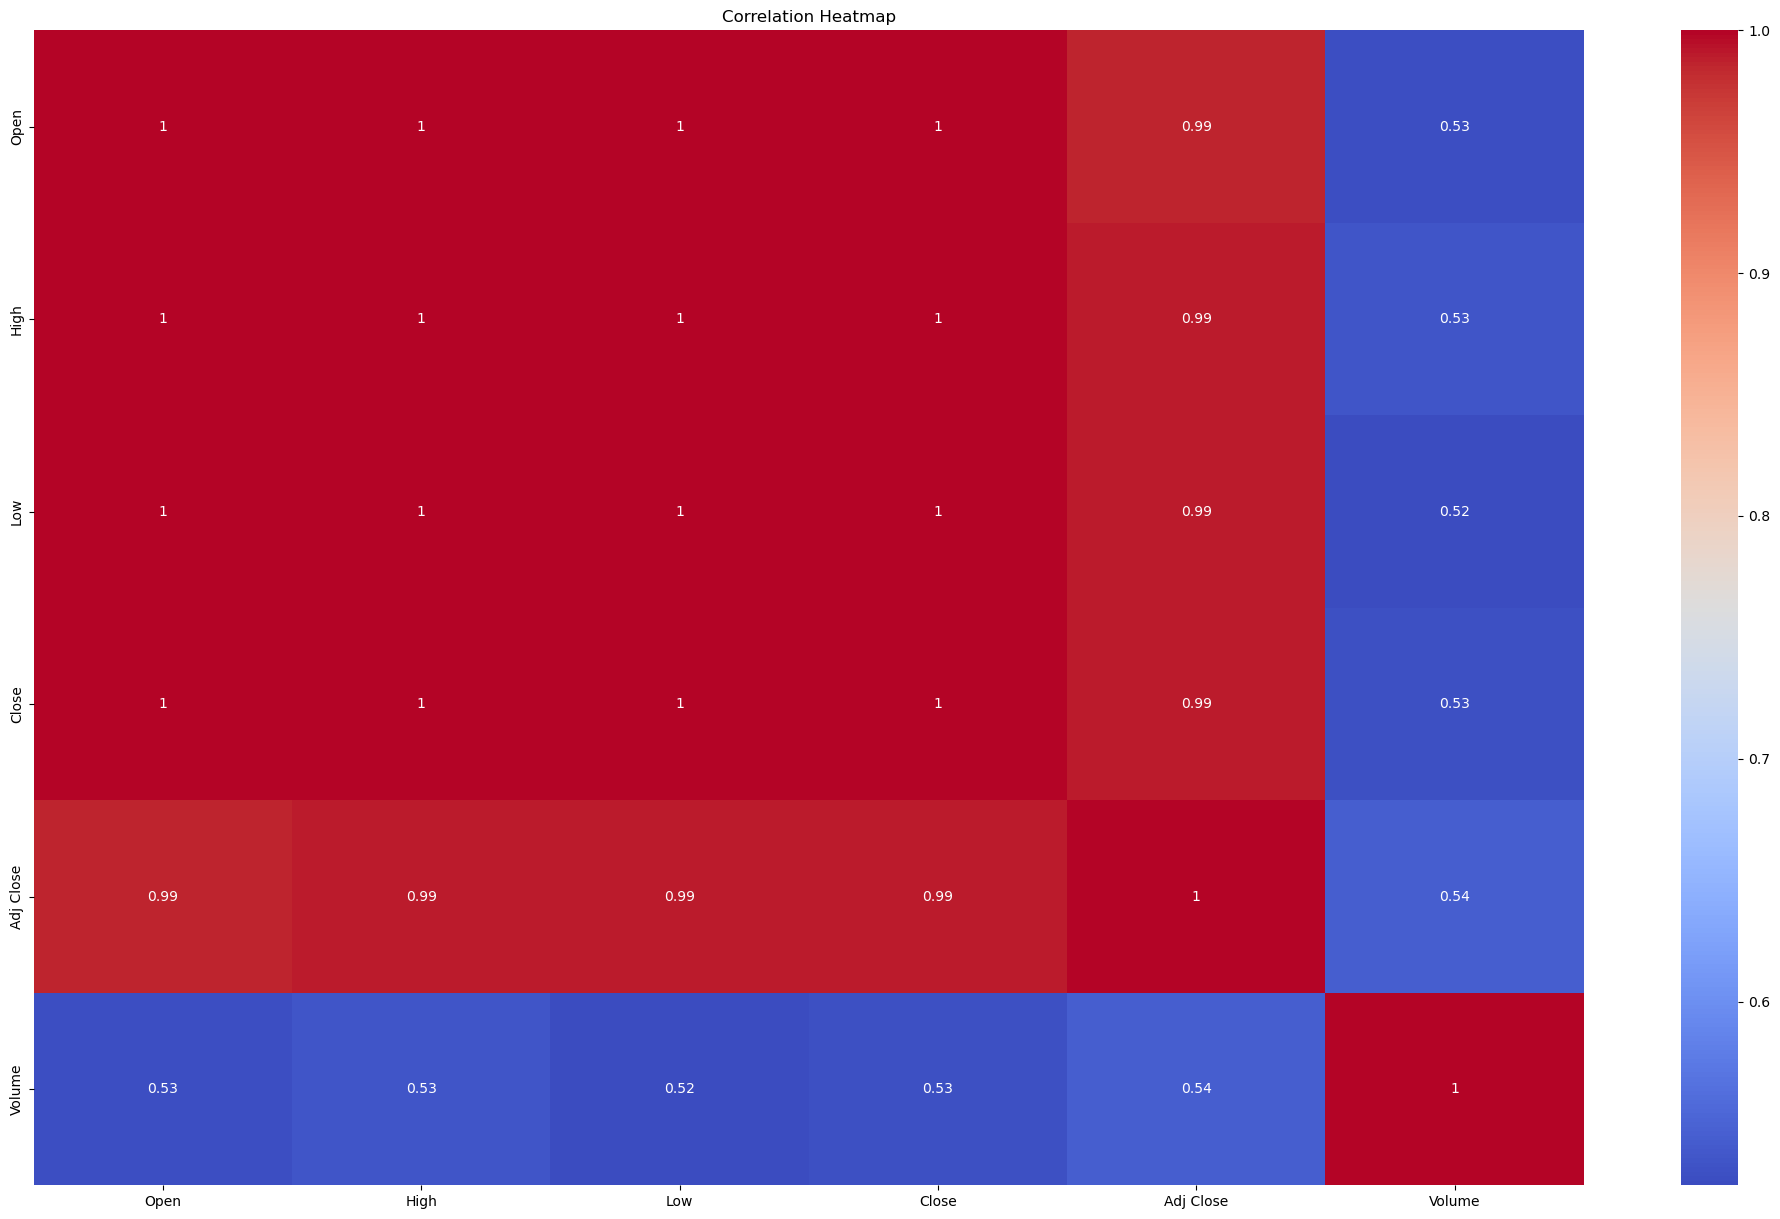

In [201]:
plt.figure(figsize=(25, 15))
correlation_matrix = sm.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [257]:
sm = sm['Open'].values
sm = sm.reshape(-1, 1)

In [258]:
train0 = np.array(sm[:int(sm.shape[0]*0.8)])
test0 = np.array(sm[int(sm.shape[0]*0.8):])
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train0)
test = scaler.transform(test0)
def create_dataset(sm):
    x = []
    y = []
    for i in range(50, sm.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

xtrain, ytrain = create_dataset(train)
xtest, ytest = create_dataset(test)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [207]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 50, 96)            37632     
                                                                 
 dropout_49 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_46 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_50 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_47 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_51 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_48 (LSTM)              (None, 96)              

In [208]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [209]:
history=model.fit(xtrain, ytrain, epochs=50, batch_size=32)
model.save('Stock Market.h5')

Epoch 1/50
251/251 [==============================] - 46s 143ms/step - loss: 13.9864
Epoch 2/50
251/251 [==============================] - 36s 145ms/step - loss: 1.5191
Epoch 3/50
251/251 [==============================] - 37s 146ms/step - loss: 1.0953
Epoch 4/50
251/251 [==============================] - 36s 143ms/step - loss: 0.9719
Epoch 5/50
251/251 [==============================] - 36s 143ms/step - loss: 0.8836
Epoch 6/50
251/251 [==============================] - 36s 143ms/step - loss: 0.8694
Epoch 7/50
251/251 [==============================] - 36s 145ms/step - loss: 0.7815
Epoch 8/50
251/251 [==============================] - 36s 142ms/step - loss: 0.8353
Epoch 9/50
251/251 [==============================] - 36s 143ms/step - loss: 0.7663
Epoch 10/50
251/251 [==============================] - 36s 144ms/step - loss: 0.7595
Epoch 11/50
251/251 [==============================] - 36s 143ms/step - loss: 0.7038
Epoch 12/50
251/251 [==============================] - 36s 144ms/step - l

loss at epoch 1: 13.986421585083008
loss at epoch 50: 0.5516811013221741


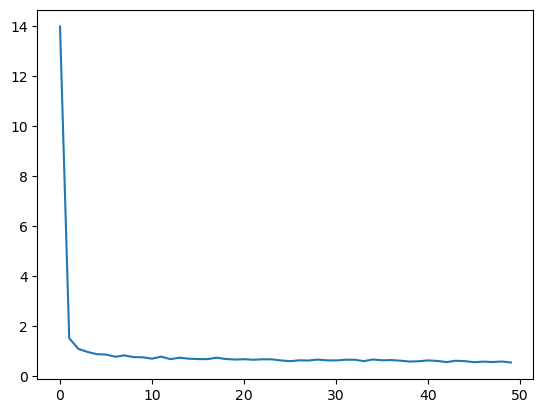

In [210]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 50: {history.history['loss'][49]}")
plt.plot(history.history['loss'])

In [211]:
model = load_model('Stock Market.h5')

62/62 [==============================] - 4s 44ms/step


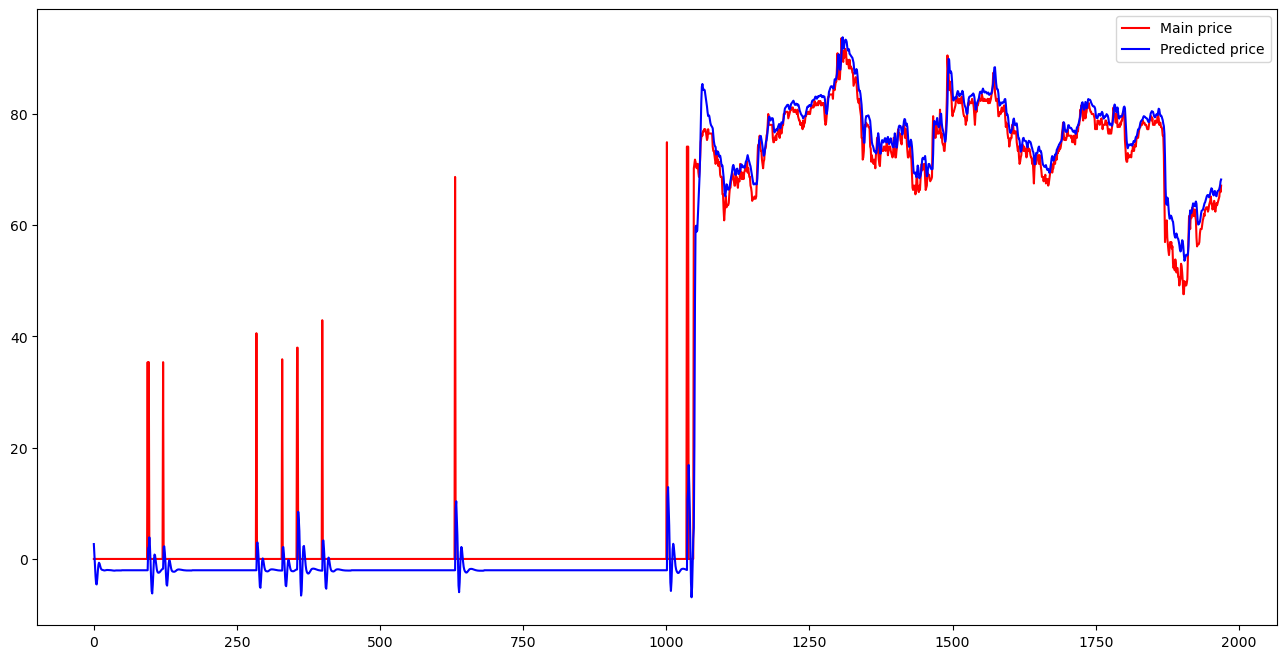

In [212]:
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)
ytest_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#0000')
ax.plot(ytest_scaled, color='red', label='Main price')
plt.plot(predictions, color='blue', label='Predicted price')
plt.legend()

62/62 [==============================] - 3s 44ms/step


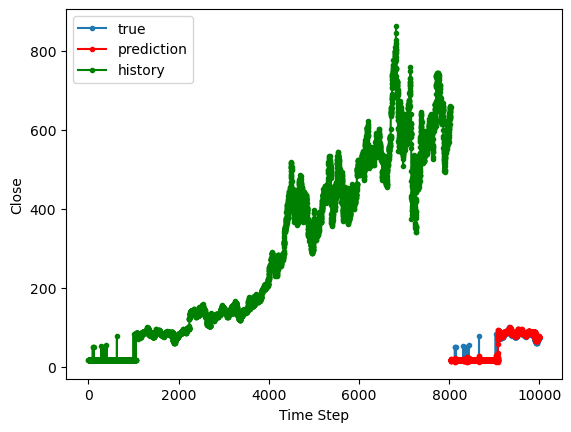

In [216]:
ypred = model.predict(xtest)
train_max=test0.max()
train_min=test0.min()

ytest = ytest*(train_max - train_min) + train_min
ypred = ypred*(train_max - train_min) + train_min
ytrain = ytrain*(train_max - train_min) + train_min


plt.plot(np.arange(len(ytrain), len(ytrain) + len(ytest)), ytest.flatten(), marker='.', label="true")
plt.plot(np.arange(len(ytrain), len(ytrain) + len(ytest)), ypred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(ytrain)), ytrain.flatten(), 'g', marker='.', label="history")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [217]:
train_predict=model.predict(xtrain)
test_predict=model.predict(xtest)

62/62 [==============================] - 3s 44ms/step


In [223]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [231]:
n_past = 60


xtrain, ytrain = [], []
for i in range(n_past, len(train)):
    xtrain.append(train[i - n_past:i, 0])
    ytrain.append(train[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)


xtest, ytest = [], []
for i in range(n_past, len(test)):
    xtest.append(test[i - n_past:i, 0])
    ytest.append(test[i, 0])
xtest, ytest = np.array(xtest), np.array(ytest)

In [232]:
last_sequence = xtest[-1]


last_sequence = last_sequence.reshape(1, n_past, 1)


predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  
    last_sequence = np.roll(last_sequence, -1, axis=1)  
    last_sequence[0, -1, 0] = next_day_prediction  

predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")

1/1 [==============================] - 0s 44ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = -0.8048518300056458
Day 2: Predicted Price = -2.5708975791931152
Day 3: Predicted Price = -4.729038715362549
Day 4: Predicted Price = -6.871127128601074
Day 5: Predicted Price = -8.028903007507324
Day 6: Predicted Price = -7.454615592956543
Day 7: Predicted Price = -5.244675636291504
Day 8: Predicted Price = -2.245556592941284
Day 9: Predicted Price = 0.4691227972507477
Day 10: Predicted Price = 2.2062952518463135


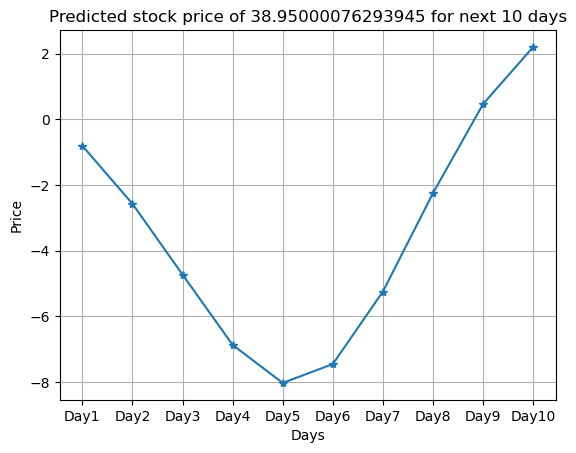

In [235]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of {company_name} for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()

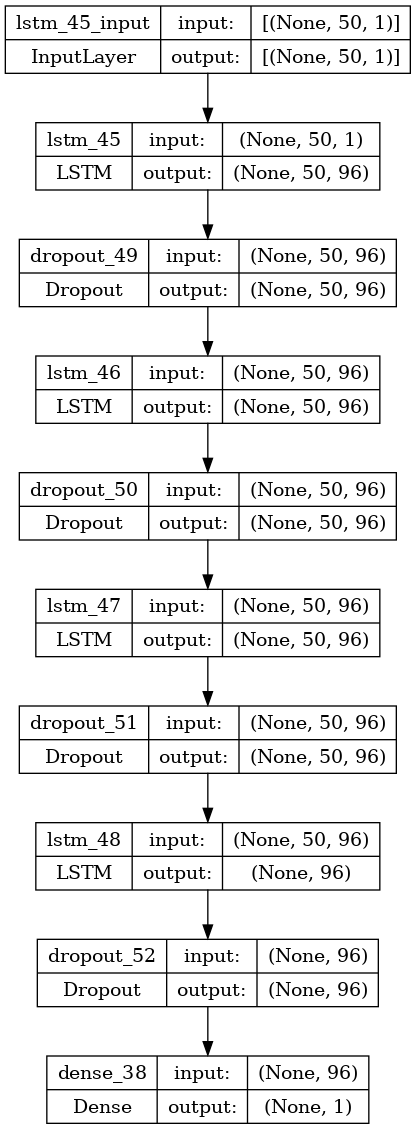

In [240]:
plot_model(model, to_file='UCF101.png', show_shapes=True, show_layer_names=True)